# Train a gesture recognition model for microcontroller (ESP32) use

This notebook demonstrates how to train a 20kb gesture recognition model for [TensorFlow Lite for Microcontrollers](https://tensorflow.org/lite/microcontrollers/overview). It will produce the same model used in the [magic_wand_esp32_mpu6050](https://github.com/stefan/MagicWand-TFLite-ESP32-MPU6050/blob/main/magic_wand_esp32_mpu6050) application.

The model is designed to be used with [Google Colaboratory](https://colab.research.google.com).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


Training is much faster using GPU acceleration. Before you proceed, ensure you are using a GPU runtime by going to **Runtime -> Change runtime type** and selecting **GPU**. Training will take around 5 minutes on a GPU runtime.

## Configure dependencies

Run the following cell to ensure the correct version of TensorFlow is used.

We'll also clone the TensorFlow repository, which contains the training scripts, and copy them into our workspace.

In [17]:
################################ Info: check where we start.
!pwd
!ls -l

/tmp
total 76
srwxr-xr-x 1 root root     0 Dec  5 05:44 colab_runtime.sock
-rw-r--r-- 1 root root  1299 Dec  5 05:44 dap_multiplexer.628a85fb2680.root.log.INFO.20241205-054419.114
lrwxrwxrwx 1 root root    62 Dec  5 05:44 dap_multiplexer.INFO -> dap_multiplexer.628a85fb2680.root.log.INFO.20241205-054419.114
srwxr-xr-x 1 root root     0 Dec  5 05:44 debugger_2az7cn5c5v
drwx------ 2 root root  4096 Dec  5 05:48 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root  7238 Dec  5 05:53 language_service.628a85fb2680.root.log.ERROR.20241205-055318.1087
-rw-r--r-- 1 root root 12819 Dec  5 05:54 language_service.628a85fb2680.root.log.INFO.20241205-054805.1087
-rw-r--r-- 1 root root  2924 Dec  5 05:58 language_service.628a85fb2680.root.log.INFO.20241205-055445.2833
-rw-r--r-- 1 root root  7238 Dec  5 05:53 language_service.628a85fb2680.root.log.WARNING.20241205-055318.1087
lrwxrwxrwx 1 root root    65 Dec  5 05:53 language_service.ERROR -> language_service.628a85fb2680.root.log.ERROR.20241205-055318.10

In [18]:
# Clone the repository from GitHub
!git clone --depth 1 -q https://github.com/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050.git
# Copy the training scripts into our workspace
!cp -r MagicWand-TFLite-ESP32-MPU6050/train train

In [19]:
################################ Info: let's see what's added..
!ls -l

total 84
srwxr-xr-x 1 root root     0 Dec  5 05:44 colab_runtime.sock
-rw-r--r-- 1 root root  1299 Dec  5 05:44 dap_multiplexer.628a85fb2680.root.log.INFO.20241205-054419.114
lrwxrwxrwx 1 root root    62 Dec  5 05:44 dap_multiplexer.INFO -> dap_multiplexer.628a85fb2680.root.log.INFO.20241205-054419.114
srwxr-xr-x 1 root root     0 Dec  5 05:44 debugger_2az7cn5c5v
drwx------ 2 root root  4096 Dec  5 05:48 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root  7238 Dec  5 05:53 language_service.628a85fb2680.root.log.ERROR.20241205-055318.1087
-rw-r--r-- 1 root root 12819 Dec  5 05:54 language_service.628a85fb2680.root.log.INFO.20241205-054805.1087
-rw-r--r-- 1 root root  3124 Dec  5 05:59 language_service.628a85fb2680.root.log.INFO.20241205-055445.2833
-rw-r--r-- 1 root root  7238 Dec  5 05:53 language_service.628a85fb2680.root.log.WARNING.20241205-055318.1087
lrwxrwxrwx 1 root root    65 Dec  5 05:53 language_service.ERROR -> language_service.628a85fb2680.root.log.ERROR.20241205-055318.1087
lr

In [32]:
################################ Info: take a look at what's in there.
!ls ./MagicWand-TFLite-ESP32-MPU6050/train -l
!ls ./train -l

total 92
-rw-r--r-- 1 root root  2889 Dec  5 06:00 data_augmentation.py
-rw-r--r-- 1 root root  2096 Dec  5 06:00 data_augmentation_test.py
-rw-r--r-- 1 root root  4173 Dec  5 06:00 data_load.py
-rw-r--r-- 1 root root  4213 Dec  5 06:00 data_load_test.py
-rw-r--r-- 1 root root  3490 Dec  5 06:00 data_plot.py
-rw-r--r-- 1 root root  5995 Dec  5 06:00 data_prepare.py
-rw-r--r-- 1 root root  2813 Dec  5 06:00 data_prepare_test.py
-rw-r--r-- 1 root root  2878 Dec  5 06:00 data_split_person.py
-rw-r--r-- 1 root root  1905 Dec  5 06:00 data_split_person_test.py
-rw-r--r-- 1 root root  3071 Dec  5 06:00 data_split.py
-rw-r--r-- 1 root root  3141 Dec  5 06:00 data_split_test.py
-rw-r--r-- 1 root root  3624 Dec  5 06:00 README.md
-rw-r--r-- 1 root root    32 Dec  5 06:00 requirements.txt
-rw-r--r-- 1 root root 11296 Dec  5 06:00 train_magic_wand_model.ipynb
-rw-r--r-- 1 root root  8654 Dec  5 06:00 train.py
-rw-r--r-- 1 root root  2849 Dec  5 06:00 train_test.py
total 96
drwxr-xr-x 6 root root 

## Prepare the data

Next, we'll extract the data into the expected location within the training scripts' directory.

In [25]:
# Extract the data into the train directory
!unzip  MagicWand-TFLite-ESP32-MPU6050/data/data.zip -d train
#!tar xvzf data.tar.gz -C train 1>/dev/null

Archive:  MagicWand-TFLite-ESP32-MPU6050/data/data.zip
   creating: train/data/
   creating: train/data/negative/
  inflating: train/data/negative/output_negative_Elekas.txt  
  inflating: train/data/negative/output_negative_arthur.txt  
  inflating: train/data/negative/output_negative_filip.txt  
  inflating: train/data/negative/output_negative_kai.txt  
  inflating: train/data/negative/output_negative_lukas.txt  
  inflating: train/data/negative/output_negative_nico.txt  
  inflating: train/data/negative/output_negative_peter.txt  
  inflating: train/data/negative/output_negative_stefan.txt  
  inflating: train/data/negative/output_negative_yeongmi.txt  
   creating: train/data/ring/
  inflating: train/data/ring/output_ring_Elekas.txt  
  inflating: train/data/ring/output_ring_alex.txt  
  inflating: train/data/ring/output_ring_arthur.txt  
  inflating: train/data/ring/output_ring_filip.txt  
  inflating: train/data/ring/output_ring_justin.txt  
  inflating: train/data/ring/output_ri

In [31]:
################################ Info: let's see if the data is there...
!ls ./train/data -R

./train/data:
negative  ring	slope  wing

./train/data/negative:
output_negative_arthur.txt  output_negative_kai.txt    output_negative_peter.txt
output_negative_Elekas.txt  output_negative_lukas.txt  output_negative_stefan.txt
output_negative_filip.txt   output_negative_nico.txt   output_negative_yeongmi.txt

./train/data/ring:
output_ring_alex.txt	output_ring_filip.txt	output_ring_lukas.txt	 output_ring_peter.txt
output_ring_arthur.txt	output_ring_justin.txt	output_ring_nico.txt	 output_ring_stefan.txt
output_ring_Elekas.txt	output_ring_kai.txt	output_ring_patrick.txt  output_ring_yeongmi.txt

./train/data/slope:
output_slope_arthur.txt  output_slope_kai.txt	   output_slope_peter.txt
output_slope_best.txt	 output_slope_lukas.txt    output_slope_ruben.txt
output_slope_filip.txt	 output_slope_nico.txt	   output_slope_stefan.txt
output_slope_justin.txt  output_slope_patrick.txt  output_slope_yeongmi.txt

./train/data/wing:
output_wing_arthur.txt	output_wing_leo.txt	 output_wing_peter.tx

We now inspect the data by plotting it.

/tmp/train
not enough negative samples available, creating random data samples


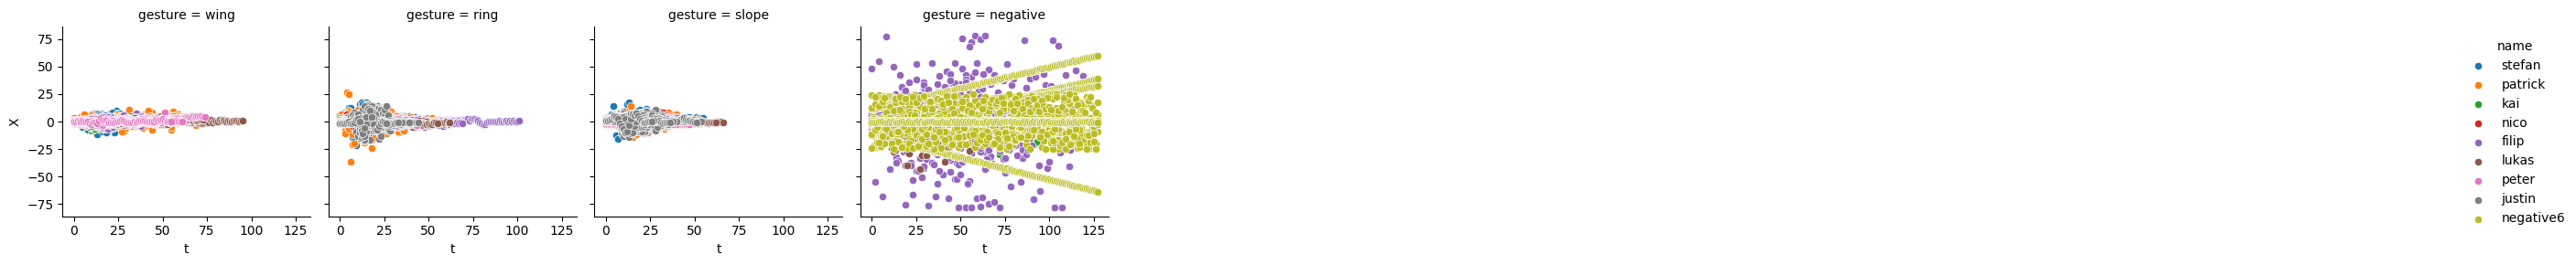

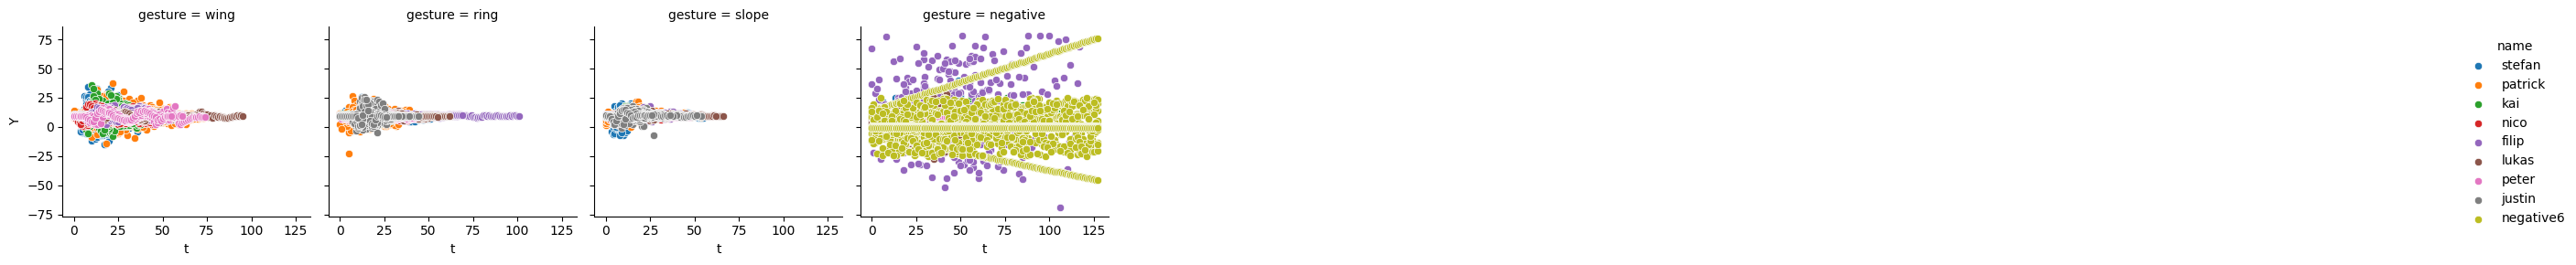

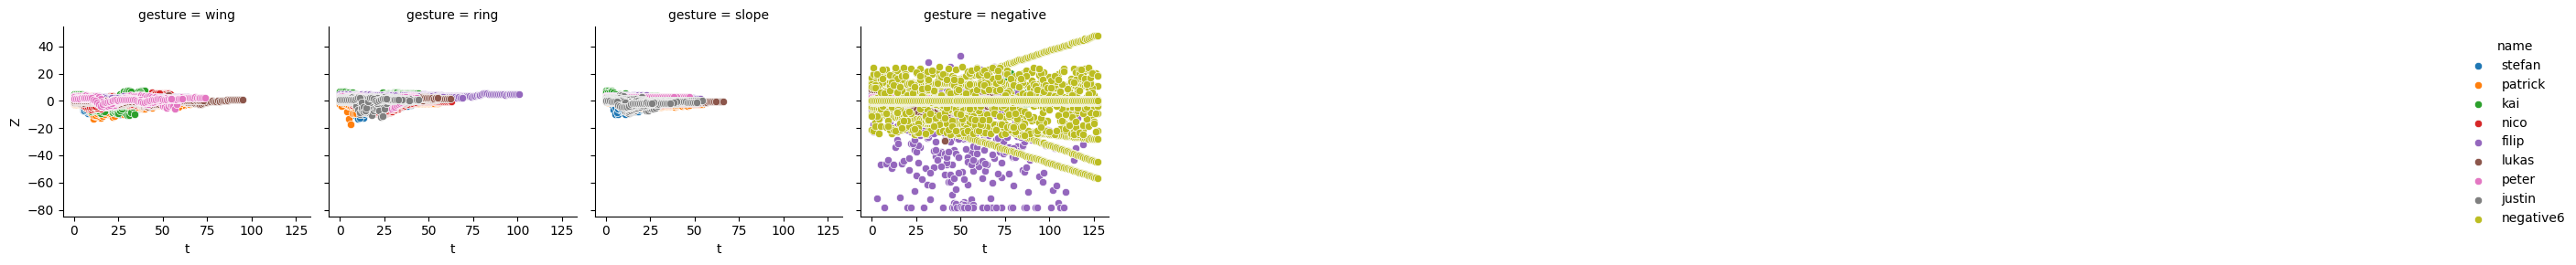

In [33]:
# The scripts must be run from within the train directory
%cd train
# Plot the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import math

from data_prepare import prepare_original_data
from data_prepare import generate_negative_data

LABEL_NAME = "gesture"
DATA_NAME = "accel_ms2_xyz"
folders = ["wing", "ring", "slope"]
names = [
    "stefan",
    "patrick",
    "justin",
    "yeongmi"
    "arthur",
    "kai",
    "nico",
    "filip",
    "lukas",
    "peter",
]

data = []  # pylint: disable=redefined-outer-name
for idx1, folder in enumerate(folders):
  for idx2, name in enumerate(names):
    prepare_original_data(folder, name, data,
                          "./data/%s/output_%s_%s.txt" % (folder, folder, name))
n_gestures = len(data)
for idx, name in enumerate(names):
  prepare_original_data("negative", name, data,
                        "./data/negative/output_negative_%s.txt" % (name))
n_negative = len(data) - n_gestures
folders.append("negative")

# if there are more than 10% more gesture samples per gesture as negative samples, generate additional negative
# samples
if n_gestures - n_negative * len(folders) > n_gestures/len(folders) * 0.1:
  print("not enough negative samples available, creating random data samples")
  generate_negative_data(data, (math.ceil(n_gestures/len(folders)) - n_negative))
n_negative = len(data) - n_gestures

columns = [LABEL_NAME, "name", DATA_NAME]
df = pd.DataFrame(data, columns=columns)

df_gesture_data = pd.DataFrame()
for folder in folders:
  for row in df.loc[df[LABEL_NAME] == folder].iterrows():
    tmp_data = np.array(row[1][DATA_NAME])
    df_tmp = pd.DataFrame({
      "name": np.full(len(tmp_data), row[1]["name"]),
      LABEL_NAME: np.full(len(tmp_data), folder),
      "t": range(len(tmp_data)),
      "X": tmp_data[:, 0],
      "Y": tmp_data[:, 1],
      "Z": tmp_data[:, 2]
      })
    df_gesture_data = pd.concat([df_gesture_data, df_tmp], ignore_index=True)

# print(df_gesture_data)
# sb.scatterplot(data = df_gesture_data, x = "t", y = "X", col)
# for folder in folders:
#   grid_X = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_X.map(sb.scatterplot, "t", "X")
#   grid_X.add_legend()
#   grid_Y = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_Y.map(sb.scatterplot, "t", "Y")
#   grid_Y.add_legend()
#   grid_Z = sb.FacetGrid(df_gesture_data.loc[df_gesture_data[LABEL_NAME] == folder], col = "name", hue = LABEL_NAME, col_wrap=3)
#   grid_Z.map(sb.scatterplot, "t", "Z")
#   grid_Z.add_legend()

grid_X = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_X.map(sb.scatterplot, "t", "X")
grid_X.add_legend()
grid_Y = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Y.map(sb.scatterplot, "t", "Y")
grid_Y.add_legend()
grid_Z = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Z.map(sb.scatterplot, "t", "Z")
grid_Z.add_legend()

plt.show()

We'll then run the scripts that split the data into training, validation, and test sets.

In [ ]:
# Prepare the data
#!python data_prepare.py
# Split the data by person
#!python data_split_person.py
# Split the data randomly since only one person available
#!python data_split.py

In [40]:
# Prepare the data
!python data_prepare.py
################################ Info: let's see what's added...
!ls ./data -R
!cat ./data/complete_data

not enough negative samples available, creating random data samples
gesture_data_length: 429
negative_data_length: 142
data_length: 571
./data:
complete_data  negative  ring  slope  wing

./data/negative:
output_negative_arthur.txt  output_negative_kai.txt    output_negative_peter.txt
output_negative_Elekas.txt  output_negative_lukas.txt  output_negative_stefan.txt
output_negative_filip.txt   output_negative_nico.txt   output_negative_yeongmi.txt

./data/ring:
output_ring_alex.txt	output_ring_filip.txt	output_ring_lukas.txt	 output_ring_peter.txt
output_ring_arthur.txt	output_ring_justin.txt	output_ring_nico.txt	 output_ring_stefan.txt
output_ring_Elekas.txt	output_ring_kai.txt	output_ring_patrick.txt  output_ring_yeongmi.txt

./data/slope:
output_slope_arthur.txt  output_slope_kai.txt	   output_slope_peter.txt
output_slope_best.txt	 output_slope_lukas.txt    output_slope_ruben.txt
output_slope_filip.txt	 output_slope_nico.txt	   output_slope_stefan.txt
output_slope_justin.txt  output_

In [42]:
# Split the data randomly since only one person available
!python data_split.py
################################ Info: let's see what's added...
!ls ./data -R
#!cat ./data/train

data_length:571
{'wing': 127, 'ring': 151, 'slope': 151, 'negative': 142}
train_length:341
test_length:117
./data:
complete_data  negative  ring  slope  test  train  valid  wing

./data/negative:
output_negative_arthur.txt  output_negative_kai.txt    output_negative_peter.txt
output_negative_Elekas.txt  output_negative_lukas.txt  output_negative_stefan.txt
output_negative_filip.txt   output_negative_nico.txt   output_negative_yeongmi.txt

./data/ring:
output_ring_alex.txt	output_ring_filip.txt	output_ring_lukas.txt	 output_ring_peter.txt
output_ring_arthur.txt	output_ring_justin.txt	output_ring_nico.txt	 output_ring_stefan.txt
output_ring_Elekas.txt	output_ring_kai.txt	output_ring_patrick.txt  output_ring_yeongmi.txt

./data/slope:
output_slope_arthur.txt  output_slope_kai.txt	   output_slope_peter.txt
output_slope_best.txt	 output_slope_lukas.txt    output_slope_ruben.txt
output_slope_filip.txt	 output_slope_nico.txt	   output_slope_stefan.txt
output_slope_justin.txt  output_slope_pat

## Load TensorBoard

Now, we set up TensorBoard so that we can graph our accuracy and loss as training proceeds.

In [ ]:
# Load TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/scalars

## Begin training

The following cell will begin the training process. Training will take around 5 minutes on a GPU runtime. You'll see the metrics in TensorBoard after a few epochs.

In [ ]:
#!python train.py --model CNN --person true
!python train.py --model CNN

## Create a C source file

The `train.py` script writes a model, `model.tflite`, to the training scripts' directory.

In the following cell, we convert this model into a C++ source file we can use with TensorFlow Lite for Microcontrollers.

In [ ]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i model.tflite > /content/model.cc
# Print the source file
!cat /content/model.cc